In [105]:
import pandas as pd
import numpy as np

In [106]:
# Load the test data
test_data = pd.read_csv('data/test.csv')

test_data.head()


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [107]:
# Drop the the column ID_LAT_LON_YEAR_WEEK in test_data
test_data = test_data.drop(["ID_LAT_LON_YEAR_WEEK"], axis=1)


# Drop the following columns in test_data UvAerosolLayerHeight_aerosol_height, UvAerosolLayerHeight_aerosol_pressure, UvAerosolLayerHeight_aerosol_optical_depth, UvAerosolLayerHeight_sensor_zenith_angle, UvAerosolLayerHeight_sensor_azimuth_angle, UvAerosolLayerHeight_solar_azimuth_angle, UvAerosolLayerHeight_solar_zenith_angle

test_data = test_data.drop(
    [
        "UvAerosolLayerHeight_aerosol_height",
        "UvAerosolLayerHeight_aerosol_pressure",
        "UvAerosolLayerHeight_aerosol_optical_depth",
        "UvAerosolLayerHeight_sensor_zenith_angle",
        "UvAerosolLayerHeight_sensor_azimuth_angle",
        "UvAerosolLayerHeight_solar_azimuth_angle",
        "UvAerosolLayerHeight_solar_zenith_angle",
    ],
    axis=1,
)




In [108]:
# Create a python function that converts week number to the start date of the week and apply it to the dataframe


def week_to_date(x):
    return pd.to_datetime("2022-1-1") + pd.to_timedelta(x * 7, unit="d")


test_data['date'] = test_data['week_no'].apply(week_to_date)

In [109]:
test_data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,date
0,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583,2022-01-01
1,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380,2022-01-08
2,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361,2022-01-15
3,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774,2022-01-22
4,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807,2022-01-29


In [110]:
# Perform a groupby on the date column and store it into a variable, we are grouping by the mean of the emissions
test_data = test_data.groupby("date").mean()

test_data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,-1.891072,29.880155,2022.0,0.0,-0.000027,0.610888,-0.000020,0.181840,-100.514960,29.802315,...,45907.150082,6798.195317,52049.649992,5804.731987,12.458373,0.269377,-99.920409,36.957727,-131.051876,33.579344
2022-01-08,-1.891072,29.880155,2022.0,1.0,0.000031,0.868341,0.000023,0.109762,-52.468331,16.391847,...,51635.892997,5951.599096,58087.867679,4986.877195,14.895287,0.275800,-12.395160,34.649631,-136.887903,30.032170
2022-01-15,-1.891072,29.880155,2022.0,2.0,0.000022,0.748159,0.000012,0.146314,-0.481537,29.333313,...,42886.131318,7461.460766,48643.431895,6471.196823,13.648020,0.282213,15.801877,44.069265,-141.073688,27.035339
2022-01-22,-1.891072,29.880155,2022.0,3.0,0.000123,0.696828,0.000082,0.106337,47.774591,39.744860,...,43913.340838,7200.497158,49867.183530,6205.474841,16.029312,0.278248,-41.756464,42.610174,-132.651964,29.344542
2022-01-29,-1.891072,29.880155,2022.0,4.0,0.000007,0.766768,0.000004,0.160624,23.701993,34.534930,...,48700.710337,6417.994829,54994.371602,5439.804316,13.449612,0.254960,-12.507006,34.398090,-133.900219,25.876501


In [111]:
# Drop latitude, longitude, year, week_no columns
test_data = test_data.drop(["latitude", "longitude", "year", "week_no"], axis=1)

# Extract the year from the date column and store it into a new column called year
test_data["year"] = test_data.index.year

# Extract the month from the date column and store it into a new column called month
test_data["month"] = test_data.index.month

In [112]:
# Scale the data using the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [113]:
# Load the model from the file lgbm_model.pkl
import pickle

with open("model/lgbm_model.pkl", "rb") as file:
    model = pickle.load(file)


# Predict the values of the test_data
predictions = model.predict(test_data)

# Create a dataframe with the predictions
predictions = pd.DataFrame(predictions)

In [114]:
# Rename the column 0 to emissions
predictions = predictions.rename(columns={0: "emissions"})
predictions = np.exp(predictions)


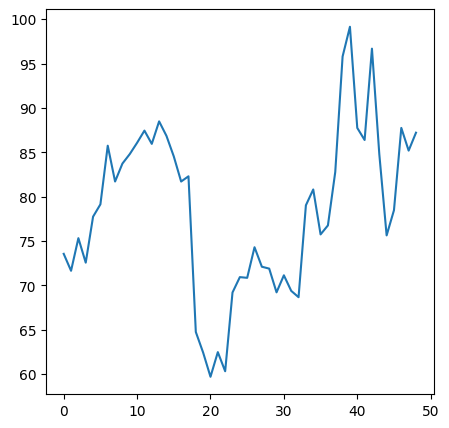

In [115]:
# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(predictions)
plt.show()
